In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('../processed_data/gurgaon_properties_missing_value_imputation.csv')

In [7]:
df.shape

(3518, 18)

In [9]:
df.head()

,property_type,society,sector,price,price_per_sq_ft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sobha city,sector 108,3.95,16858.0,3.0,5.0,2,15.0,New Property,2343.101198,0.0,1.0,0.0,0.0,0.0,1.0,118.0
1,house,unitech uniworld resorts,sector 33,11.50,24573.0,5.0,6.0,3+,4.0,Relatively New,4680.000000,0.0,1.0,0.0,0.0,0.0,1.0,84.0
2,house,independent,sector 13,4.50,9091.0,4.0,5.0,2,2.0,Old Property,4950.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,flat,paras dews,sector 106,1.35,8940.0,4.0,3.0,3,19.0,Old Property,1678.000000,0.0,1.0,0.0,0.0,0.0,1.0,112.0
4,flat,corona optus,sector 37c,1.22,6912.0,3.0,4.0,3,5.0,Relatively New,1665.000000,0.0,0.0,0.0,0.0,0.0,1.0,149.0


In [13]:
train_df = df.drop(columns=['society','price_per_sq_ft'])

In [15]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 108,3.95,3.0,5.0,2,15.0,New Property,2343.101198,0.0,1.0,0.0,0.0,0.0,1.0,118.0
1,house,sector 33,11.50,5.0,6.0,3+,4.0,Relatively New,4680.000000,0.0,1.0,0.0,0.0,0.0,1.0,84.0
2,house,sector 13,4.50,4.0,5.0,2,2.0,Old Property,4950.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,flat,sector 106,1.35,4.0,3.0,3,19.0,Old Property,1678.000000,0.0,1.0,0.0,0.0,0.0,1.0,112.0
4,flat,sector 37c,1.22,3.0,4.0,3,5.0,Relatively New,1665.000000,0.0,0.0,0.0,0.0,0.0,1.0,149.0


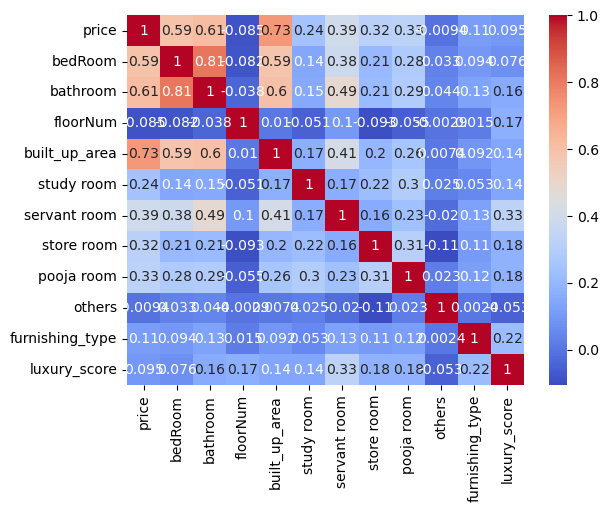

In [21]:
# Select only numeric columns
numeric_df = train_df.select_dtypes(include='number')

# Plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [25]:
numeric_df.corr()['price'].sort_values(ascending=False)

price              1.000000
built_up_area      0.727682
bathroom           0.612086
bedRoom            0.591893
servant room       0.393765
pooja room         0.325992
store room         0.315847
study room         0.242828
furnishing_type    0.113878
luxury_score       0.095258
others            -0.009351
floorNum          -0.085050
Name: price, dtype: float64

In [27]:
# cols in question

# numerical -> luxury_score, others, floorNum
# categorical -> property_type, sector, agePossession